# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
from ddpg_agent_complex import Agent
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

cuda:0


In [3]:
env = UnityEnvironment(file_name="./Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
agent=Agent(state_size=state_size,action_size=action_size,random_seed=1, num_agents=num_agents)

initalized seeds
actor set
critic set
noise set
replay memory set


c:\Users\ShiftAorus\.conda\envs\drlnd\lib\site-packages\torch\cuda\__init__.py:114: UserWarning: 
    Found GPU0 NVIDIA GeForce RTX 3090 which requires CUDA_VERSION >= 9000 for
     optimal performance and fast startup time, but your PyTorch was compiled
     with CUDA_VERSION 8000. Please install the correct PyTorch binary
     using instructions from http://pytorch.org
    
  warnings.warn(incorrect_binary_warn % (d, name, 9000, CUDA_VERSION))


In [7]:
def figures(scores):
    fig1 = plt.figure()
    ax = fig1.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.title('Progressive plot')
    plt.show()

Episode 100	Last 100 Avg Score: -0.0044999998807907105	 Episode Avg Score: -0.004999999888241291	Scores: [ 0.   -0.01]

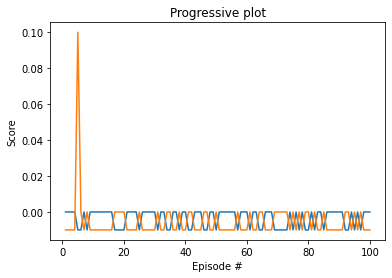

Episode 100	Average Score: -0.00
Episode 200	Last 100 Avg Score: -0.002549999849870801	 Episode Avg Score: -0.004999999888241291	Scores: [ 0.   -0.01]]

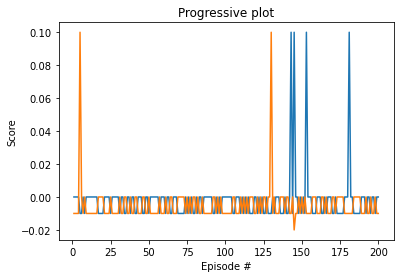

Episode 200	Average Score: -0.00
Episode 300	Last 100 Avg Score: -0.0044999998807907105	 Episode Avg Score: -0.004999999888241291	Scores: [-0.01  0.  ]

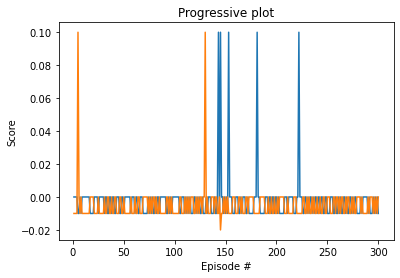

Episode 300	Average Score: -0.00
Episode 400	Last 100 Avg Score: -0.0034999998658895495	 Episode Avg Score: -0.004999999888241291	Scores: [ 0.   -0.01]

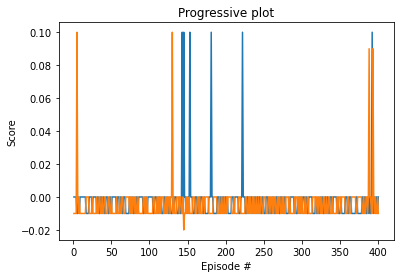

Episode 400	Average Score: -0.00
Episode 500	Last 100 Avg Score: 0.015500000417232514	 Episode Avg Score: -0.004999999888241291	Scores: [-0.01  0.  ]]]

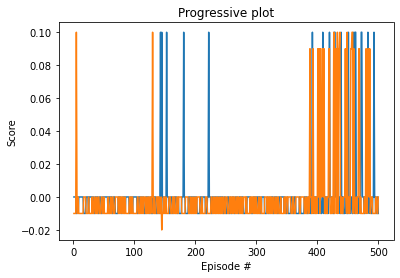

Episode 500	Average Score: 0.02
Episode 600	Last 100 Avg Score: -0.002499999850988388	 Episode Avg Score: -0.004999999888241291	Scores: [ 0.   -0.01]]

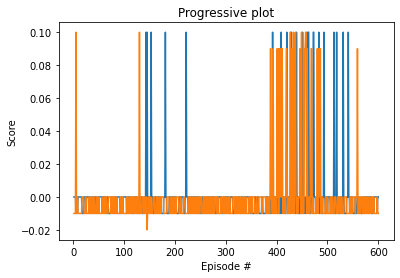

Episode 600	Average Score: -0.00
Episode 700	Last 100 Avg Score: -0.004999999888241291	 Episode Avg Score: -0.004999999888241291	Scores: [ 0.   -0.01]]

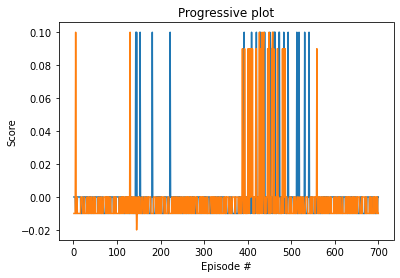

Episode 700	Average Score: -0.00
Episode 800	Last 100 Avg Score: -0.004999999888241291	 Episode Avg Score: -0.004999999888241291	Scores: [-0.01  0.  ]

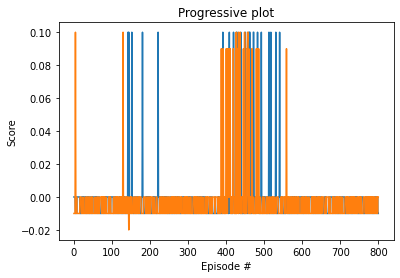

Episode 800	Average Score: -0.00
Episode 900	Last 100 Avg Score: -0.0034999998658895495	 Episode Avg Score: -0.004999999888241291	Scores: [ 0.   -0.01]

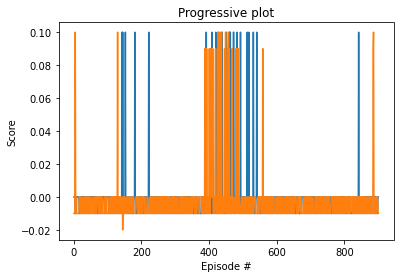

Episode 900	Average Score: -0.00
Episode 1000	Last 100 Avg Score: 0.004000000255182386	 Episode Avg Score: -0.004999999888241291	Scores: [-0.01  0.  ]]

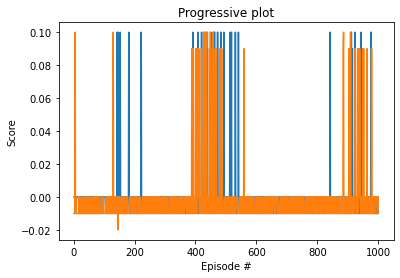

Episode 1000	Average Score: 0.00
Episode 1100	Last 100 Avg Score: -0.004549999879673123	 Episode Avg Score: -0.004999999888241291	Scores: [ 0.   -0.01]]

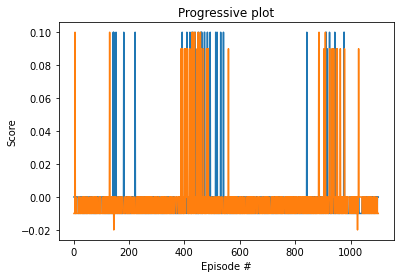

Episode 1100	Average Score: -0.00
Episode 1200	Last 100 Avg Score: 0.006000000275671482	 Episode Avg Score: -0.004999999888241291	Scores: [ 0.   -0.01]]]

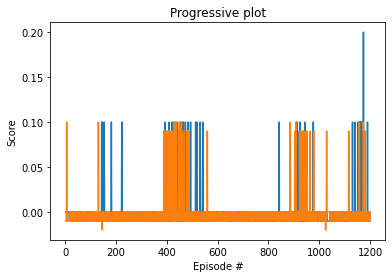

Episode 1200	Average Score: 0.01
Episode 1300	Last 100 Avg Score: 0.018500000461935995	 Episode Avg Score: 0.04500000085681677	Scores: [ 0.1  -0.01] ]

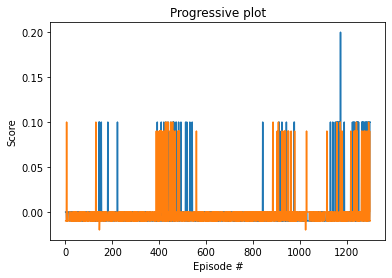

Episode 1300	Average Score: 0.02
Episode 1400	Last 100 Avg Score: 0.02850000061094761	 Episode Avg Score: -0.004999999888241291	Scores: [ 0.   -0.01]]

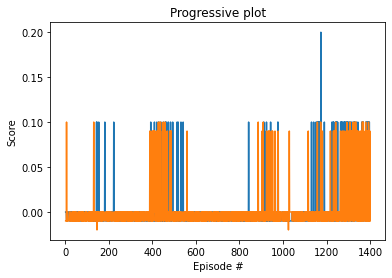

Episode 1400	Average Score: 0.03
Episode 1500	Last 100 Avg Score: 0.05150000096298754	 Episode Avg Score: 0.04500000085681677	Scores: [-0.01  0.1 ] ]]

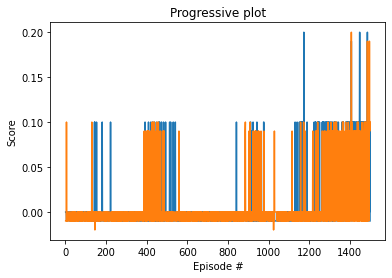

Episode 1500	Average Score: 0.05
Episode 1600	Last 100 Avg Score: 0.06450000114738941	 Episode Avg Score: 0.1450000023469329	Scores: [0.09 0.2 ]01] ]]00001]

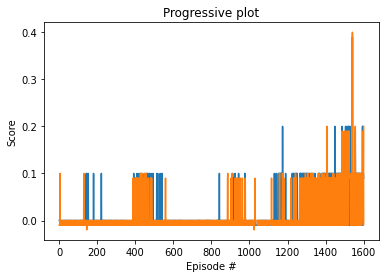

Episode 1600	Average Score: 0.06
Episode 1700	Last 100 Avg Score: 0.0995000016875565	 Episode Avg Score: 0.04500000085681677	Scores: [-0.01  0.1 ]  ]9000001]

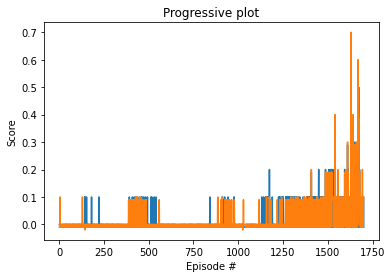

Episode 1700	Average Score: 0.10
Episode 1800	Last 100 Avg Score: 0.3865500059444457	 Episode Avg Score: 0.3950000060722232	Scores: [0.39000001 0.40000001]]]

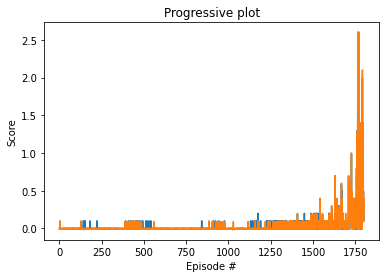

Episode 1800	Average Score: 0.39
Episode 1849	Last 100 Avg Score: 0.5051500077079981	 Episode Avg Score: 2.600000038743019	Scores: [2.60000004 2.60000004]]]

In [8]:


def maddpg(n_episodes=2000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    score = np.zeros(num_agents)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            action, actionWithoutNoise = agent.act(state)
            otherAgents_action = np.flip(action,0)
            env_info = env.step(action)[brain_name]
            reward = env_info.rewards
            next_state = env_info.vector_observations
            otherAgents_next_state = np.flip(next_state,0)
            done = env_info.local_done
            agent.step(state, action,otherAgents_action, reward, next_state,otherAgents_next_state, done)
            state = next_state
            score = score + np.array(reward)
            if np.any(done):
                break 
        scores_deque.append(score)
        scores.append(score)
        meanScore = np.mean(scores_deque)
        print('\rEpisode {}'.format(i_episode)+'\tLast 100 Avg Score: {}'.format(meanScore) +'\t Episode Avg Score: {}'.format(np.mean(score))  +'\tScores: {}'.format(score), end="")
        if i_episode % 100 == 0:
            figures(scores)
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if meanScore > 0.5:
            # enough training
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break   
    return scores

scores = maddpg(n_episodes=10000, max_t=10000)



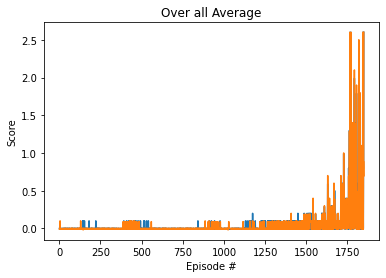

In [9]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Over all Average')
plt.show()

Total score (averaged over agents) this episode: 2.4990000372380017
Scores of agents last episode: [array([2.70000004, 2.60000004])]


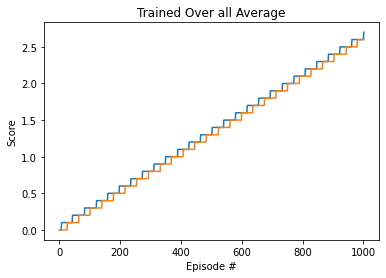

In [10]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = []
episodeScore = 0
while True:
    ignoreInTesting, actions = agent.act(states, add_noise=False) # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    episodeScore =  episodeScore + np.array(rewards)
    scores.append(episodeScore)                        # update the score (for each agent)
    states = next_states                               # roll over states to next time step

    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores[-100:])))
print('Scores of agents last episode: {}'.format(scores[-1:]))
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Trained Over all Average')
plt.show()

In [11]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.10000000149011612


When finished, you can close the environment.

In [12]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```